#***Predicción de accidentes cerebrovasculares***

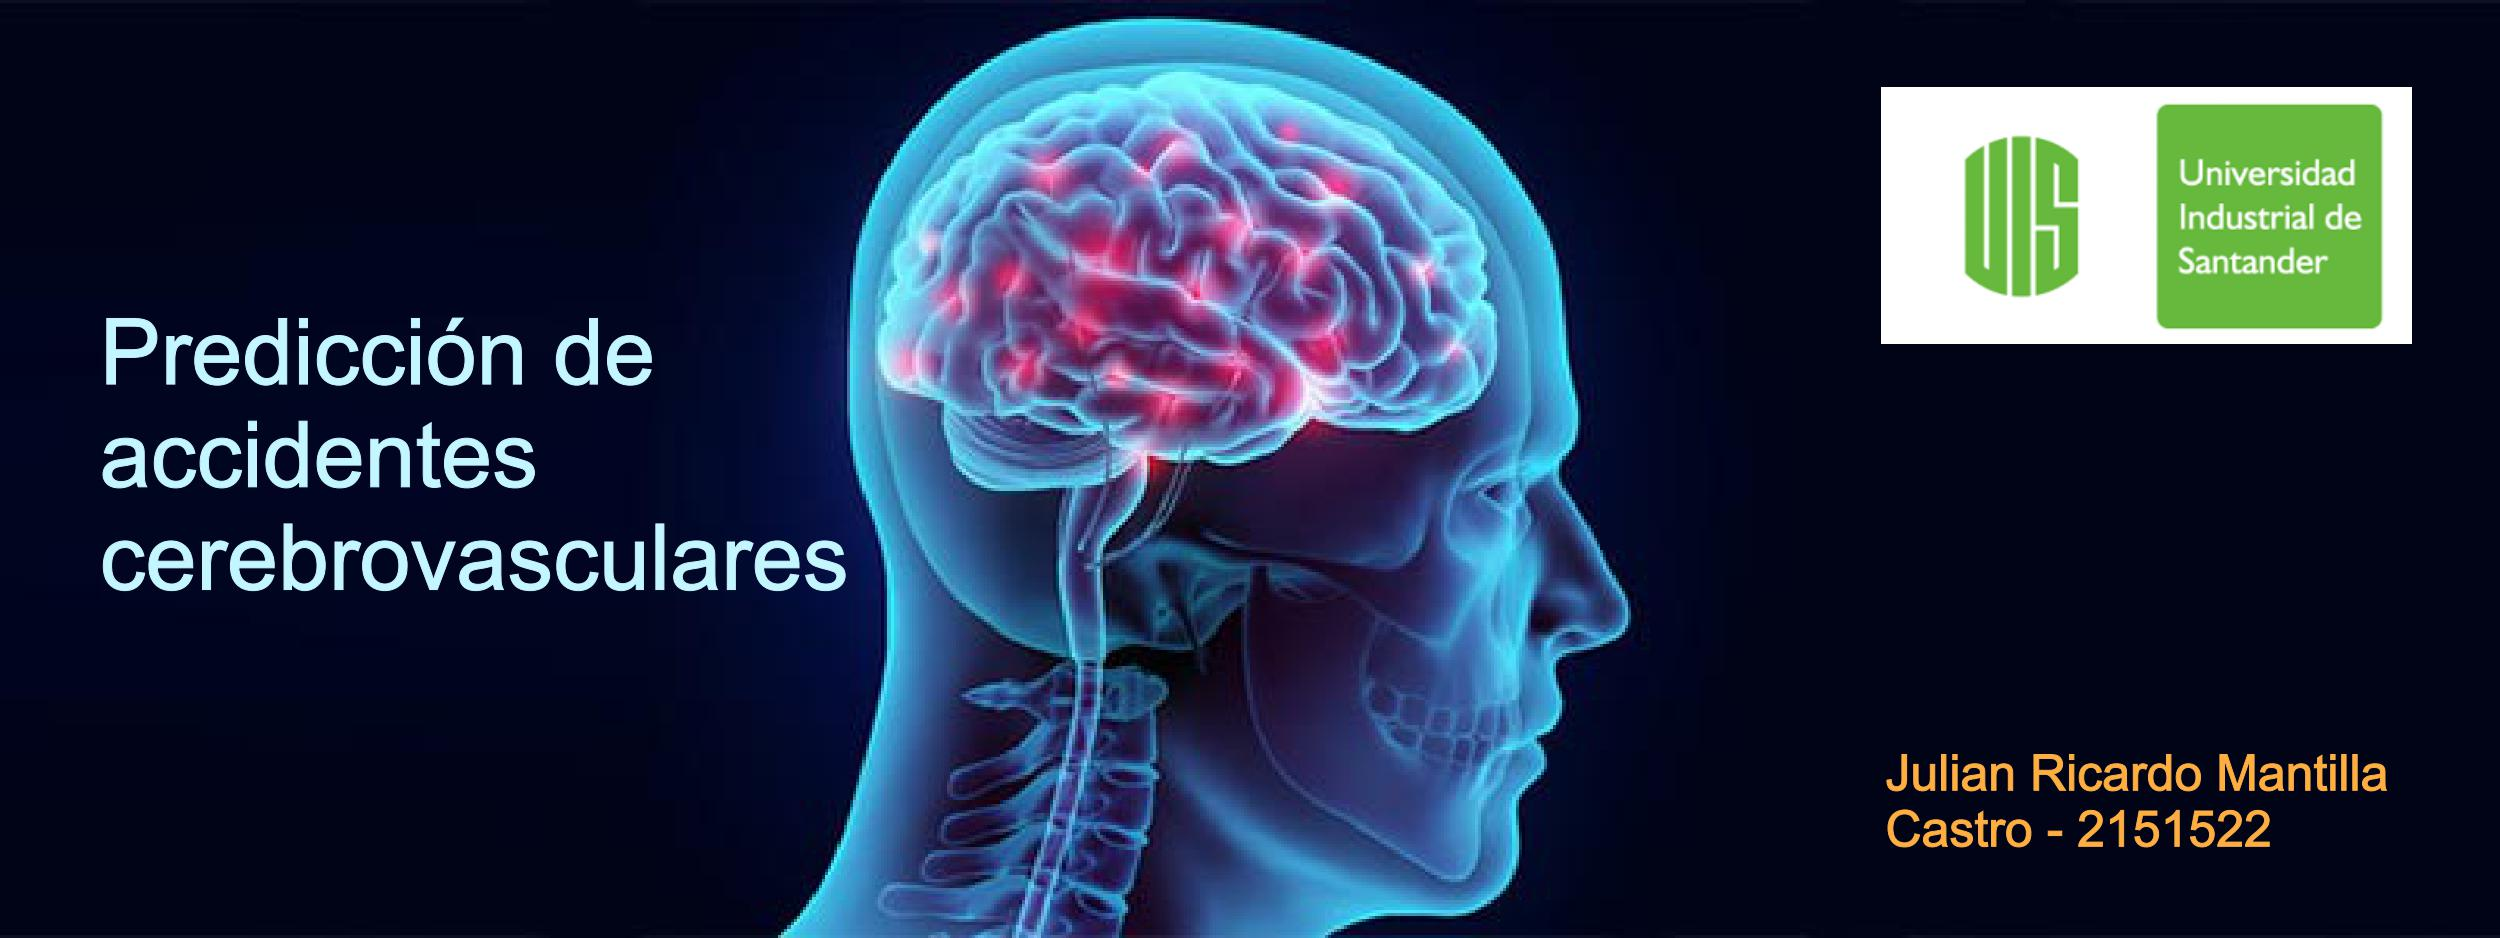

Cargamos las librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


sns.set_theme()
pd.__version__

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

Continuamos cargando el csv donde esta la información del dataset llamado "Brain stroke prediction dataset" obtenido de la pagina Kaggle

In [2]:
from google.colab import files
files.upload()

Saving full_data.csv to full_data.csv


{'full_data.csv': b'gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke\nMale,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1\nMale,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1\nFemale,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1\nFemale,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1\nMale,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1\nMale,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1\nFemale,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1\nFemale,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1\nFemale,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1\nFemale,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1\nFemale,54.0,0,0,Yes,Private,Urban,104.51,27.3,smokes,1\nFemale,79.0,0,1,Yes,Private,Urban,214.09,28.2,never smoked,1\nFemale,50.0,1,0,Yes,Self-employed,Rural,167.41,30.9,never smoked,1\nMale,64.0,0,1,Yes,Private,Urban,191.61,37.5,smokes,1\nMale,75.0,1,0,Ye

In [3]:
data= pd.read_csv("full_data.csv")
print(data.shape)

(4981, 11)


In [4]:
data.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1  
2          Urban             171.23  34.4           smokes       1  
3          Rural             174.12  24.0     never smoked       1  
4          Urban             186.21  29.0  formerly smoked       1

In [5]:
descripcion = data.describe()
descripcion.head()

age  hypertension  heart_disease  avg_glucose_level  \
count  4981.000000   4981.000000    4981.000000        4981.000000   
mean     43.419859      0.096165       0.055210         105.943562   
std      22.662755      0.294848       0.228412          45.075373   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.230000   

               bmi       stroke  
count  4981.000000  4981.000000  
mean     28.498173     0.049789  
std       6.790464     0.217531  
min      14.000000     0.000000  
25%      23.700000     0.000000

**¿Que es un accidente Cerebrovascular?**

Un accidente cerebrovascular es una afección médica en la que el flujo sanguíneo deficiente al cerebro provoca la muerte celular.

 Hay dos tipos principales de accidente cerebrovascular: isquémico, debido a la falta de flujo sanguíneo, y hemorrágico, debido al sangrado. Ambos hacen que partes del cerebro dejen de funcionar correctamente. 
 
 Los signos y síntomas de un accidente cerebrovascular pueden incluir incapacidad para moverse o sentir un lado del cuerpo, problemas para entender o hablar, mareos o pérdida de la visión de un lado. Los signos y síntomas suelen aparecer poco después de que se haya producido el accidente cerebrovascular. Un accidente cerebrovascular hemorrágico también puede estar asociado con un dolor de cabeza intenso. Los síntomas de un derrame cerebral pueden ser permanentes. Las complicaciones a largo plazo pueden incluir neumonía y pérdida del control de la vejiga.

El principal factor de riesgo de accidente cerebrovascular es la presión arterial alta. Otros factores de riesgo incluyen el colesterol alto en la sangre, el tabaquismo, la obesidad, la diabetes mellitus, la enfermedad renal en etapa terminal y la fibrilación auricular.

 Un accidente cerebrovascular isquémico generalmente es causado por la obstrucción de un vaso sanguíneo, aunque también existen causas menos comunes.
 
 Un accidente cerebrovascular hemorrágico es causado por una hemorragia directamente en el cerebro o en el espacio entre las membranas del cerebro. El sangrado puede ocurrir debido a la ruptura de un aneurisma cerebral. 

##Información de atributos

1) género: "Masculino", "Femenino" u "Otro"


2) edad: edad del paciente


3) hipertensión: 0 si el paciente no tiene hipertensión, 1 si el paciente tiene hipertensión


4) enfermedad del corazón: 0 si el paciente no tiene ninguna enfermedad del corazón, 1 si el paciente tiene una enfermedad del corazón 

5) casado alguna vez: "No" o "Sí"

6) tipo de trabajo: "niños", "Govtjov", "Nunca trabajó", "Privado" o "Empleado por cuenta propia"

 7) Tipo de residencia: "Rural" o "Urbano"

8) avgglucoselevel: nivel promedio de glucosa en sangre

9) IMC: índice de masa corporal

10) smoking_status: "anteriormente fumó", "nunca fumó", "fuma" o "Desconocido"*

11) accidente cerebrovascular: 1 si el paciente tuvo un accidente cerebrovascular o 0 si no

In [6]:
d=data[["age","hypertension","avg_glucose_level","bmi","heart_disease","stroke"]]
d.head(100)

age  hypertension  avg_glucose_level   bmi  heart_disease  stroke
0   67.0             0             228.69  36.6              1       1
1   80.0             0             105.92  32.5              1       1
2   49.0             0             171.23  34.4              0       1
3   79.0             1             174.12  24.0              0       1
4   81.0             0             186.21  29.0              0       1
..   ...           ...                ...   ...            ...     ...
95  71.0             1             216.94  30.9              1       1
96  61.0             1              76.11  27.3              0       1
97  74.0             0              72.96  31.3              0       1
98  38.0             0              82.28  24.0              0       1
99  77.0             0             105.22  31.0              0       1

[100 rows x 6 columns]

In [7]:
casos_p=0
casos_n=0
n=d.shape[0]
for i in range(n):
  if d.stroke[i] == 1 :
    casos_p = casos_p + 1
  else :
    if d.stroke[i] == 0 :
      casos_n= casos_n + 1

print(casos_p,casos_n)

248 4733


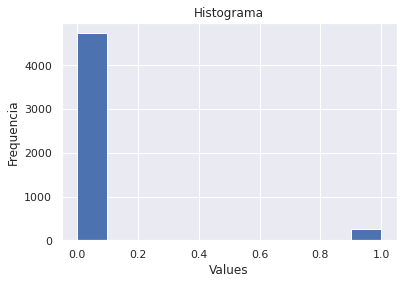

In [8]:
n, bins, patches=plt.hist(d.stroke,bins=10)
plt.xlabel("Values")
plt.ylabel("Frequencia")
plt.title("Histograma")
plt.show()

In [9]:
positivos=d[d.stroke==1]
negativos_t=d[d.stroke==0]
negativos=negativos_t[0:248]
d1=pd.concat([positivos,negativos],ignore_index=True)


print(positivos.head(100))
print(negativos_t.head(100))
print(negativos.head(100))
print(d1.head(100))
print(d1.shape)

     age  hypertension  avg_glucose_level   bmi  heart_disease  stroke
0   67.0             0             228.69  36.6              1       1
1   80.0             0             105.92  32.5              1       1
2   49.0             0             171.23  34.4              0       1
3   79.0             1             174.12  24.0              0       1
4   81.0             0             186.21  29.0              0       1
..   ...           ...                ...   ...            ...     ...
95  71.0             1             216.94  30.9              1       1
96  61.0             1              76.11  27.3              0       1
97  74.0             0              72.96  31.3              0       1
98  38.0             0              82.28  24.0              0       1
99  77.0             0             105.22  31.0              0       1

[100 rows x 6 columns]
      age  hypertension  avg_glucose_level   bmi  heart_disease  stroke
208   3.0             0              95.12  18.0    

Tomamos el 80% para entrenamiento y el 20 para testeo, iniciamos usando GaussianNB para la clasificación y viendo su precision:

In [10]:
X = d1.values[:,:-1]
y = d1.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, shuffle=True)
est = GaussianNB()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.65


Definimos true positive y true negative

In [11]:
def tpr(est,X,y):
    p = est.predict(X)
    return np.mean (p[y==1] == y[y==1])

def tnr(est,X,y):
    p = est.predict(X)
    return np.mean(p[y==0] == y[y==0])

Usando cross validation obtenemos:

In [12]:
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.698 (+/- 0.06580)
tpr      0.600 (+/- 0.07088)
tnr      0.803 (+/- 0.10897)


Usamos el uno de los mas sencillos clasificadores el DecisionTreeClassifier con un max_depth=20 

In [13]:
est = DecisionTreeClassifier(max_depth=20)
est.fit(X_train,y_train)
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.673 (+/- 0.06681)
tpr      0.692 (+/- 0.06896)
tnr      0.650 (+/- 0.09359)


In [14]:
est = DecisionTreeClassifier(max_depth=50)

s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.671 (+/- 0.06671)
tpr      0.635 (+/- 0.08460)
tnr      0.668 (+/- 0.10020)


In [15]:
est = DecisionTreeClassifier(max_depth=500)

s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.728 (+/- 0.05470)
tpr      0.675 (+/- 0.08686)
tnr      0.683 (+/- 0.09919)


Ahora usamos el  RandomForestClassifier 

In [16]:
est = RandomForestClassifier()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.72


In [17]:
est = RandomForestClassifier()

s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.736 (+/- 0.03625)
tpr      0.730 (+/- 0.10187)
tnr      0.706 (+/- 0.06296)


In [18]:
est = RandomForestClassifier(n_estimators = 500 )

s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.730 (+/- 0.05758)
tpr      0.754 (+/- 0.08977)
tnr      0.705 (+/- 0.10219)


In [19]:
est = RandomForestClassifier(n_estimators = 1000 )

s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.748 (+/- 0.04602)
tpr      0.747 (+/- 0.06455)
tnr      0.680 (+/- 0.10666)


In [20]:
est = RandomForestClassifier(n_estimators = 10000 )

s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.742 (+/- 0.07271)
tpr      0.762 (+/- 0.11271)
tnr      0.712 (+/- 0.06623)



 Podemos notar que para el estimador GaussianNB la precisión es un poco baja, ademas los true positive tambien son los resultado que mas nos interesan tambien son relativamente bajos.

 Al usar el estimador DecisionTreeClassifier obtenemos mejores resultados, ademas estos resultados no mejoran aunque usemos diferentes max_depth.

Cuando usamos el estimador RandomForestClassifier de precisión y lo que mas nos interesa buenos resultados de tree positive, es decir que este es el mejor estimador para este caso. 


